In [1]:
import time
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import scipy
#from PIL import Image
#from scipy import ndimage
#from dnn_app_utils_v3 import *
#from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward


## Dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [28]:
dataset_train.describe()


,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [15]:
def return_desc(df): 
    return print(df.describe()), print (df.dtypes),print (df.head(3)) ,print(df.isnull().sum()),print (df.shape)

print(return_desc(dataset_train))


              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000
Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object
       Date    Open    High     Low   Close     Volume
0  1/3/2012  325.25  332.83  324.97  663.59  7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45  5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21  6,590,300
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
(1258, 6)
(None, None, None, None, None)


In [5]:
conda install scikit-learn -v

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Akash\Anaconda3\envs\tensorflow_newenv

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.14.1              |             py_0         201 KB
    scikit-learn-0.22.1        |   py37h6288b17_0         4.7 MB
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.14.1-py_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.22.1-py37h6288b17_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda


initializing UnlinkLinkTransaction with
  target_prefix: C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  unlink_precs:
    
  link_precs:
    defaults::joblib-0.14.1-py_0
    defaults::scikit-learn-0.22.1-py37h6288b17_0


===> LINKING PACKAGE: defaults::joblib-0.14.1-py_0 <===
  prefix=C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  source=C:\Users\Akash\Anaconda3\pkgs\joblib-0.14.1-py_0


===> LINKING PACKAGE: defaults::scikit-learn-0.22.1-py37h6288b17_0 <===
  prefix=C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  source=C:\Users\Akash\Anaconda3\pkgs\scikit-learn-0.22.1-py37h6288b17_0




In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
training_set_scaled.shape

(1258, 1)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = [] #LIST
y_train = [] #list
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) # changed the list to array
y_train = y_train.reshape(1198,1)

In [25]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [6]:
print(X_train.shape, y_train.shape)

(1198, 60) (1198, 1)


In [5]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
print(return_desc(dataset_test))

             Open        High         Low       Close
count   20.000000   20.000000   20.000000   20.000000
mean   807.526000  811.926500  801.949500  807.904500
std     15.125428   14.381198   13.278607   13.210088
min    778.810000  789.630000  775.800000  786.140000
25%    802.965000  806.735000  797.427500  802.282500
50%    806.995000  808.640000  801.530000  806.110000
75%    809.560000  817.097500  804.477500  810.760000
max    837.810000  841.950000  827.010000  835.670000
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
(20, 6)
(None, None, None, None, None)


In [6]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#predicted_stock_price = regressor.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [7]:
inputs.shape

(80, 1)

## Helper Functions

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")

baseline = 10

baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

time = time.reshape(1461,1)
time = time[:1258]

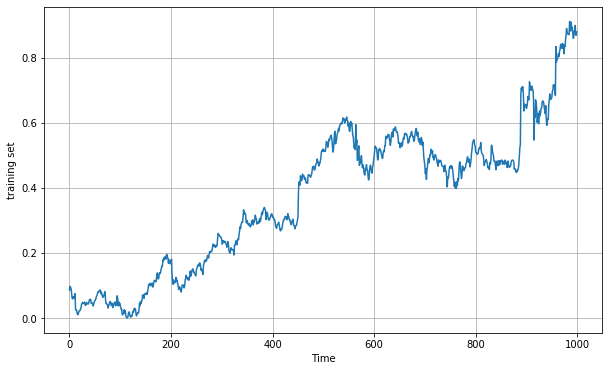

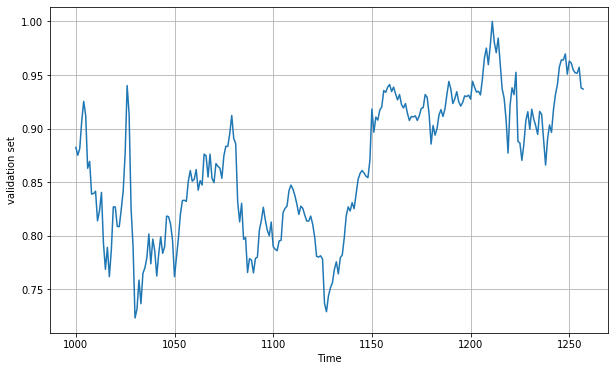

In [64]:
split_time = 1000  
time_train = time[:split_time]  # 
s_t = 55
x_train = training_set_scaled[:split_time]
time_valid = time[split_time:]    # time to validate or test
x_valid = training_set_scaled[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.ylabel("training set")
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.ylabel("validation set")
plt.show()

## Moving Average Forecast


In [123]:
def moving_average_forecast(series, window_size):
    forecast = []
    for i in range(len(series) - window_size):
        forecast.append(series[i:i + window_size].mean())
    return np.array(forecast)
 

In [146]:
moving_avg = moving_average_forecast(training_set_scaled, 10)[split_time - 10:]
moving_avg = moving_avg.reshape(258,1)

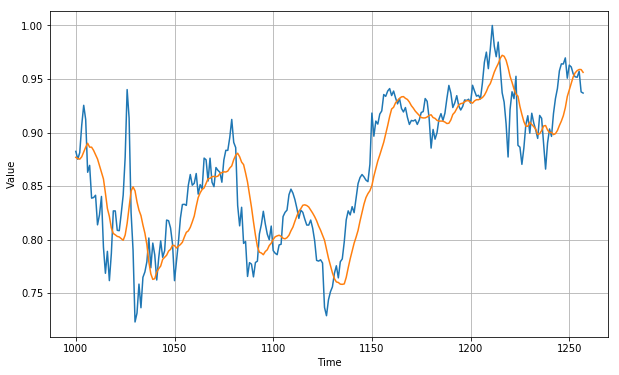

In [151]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

But this is using the actual value to forecast the avg;
so looks from it, can produce only one forward

In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(x_valid, moving_avg)
mse = mean_squared_error(x_valid, moving_avg)
r2 = r2_score(x_valid, moving_avg)

print("scores are: {} {} {}".format(mae,mse,r2))

scores are: 0.025373745912480806 0.0011067737622009201 0.7311990405216434


## Difference Moving Average

from the plot above we can say the difference can be half yearly = 182

D = 0,1,2 not more 

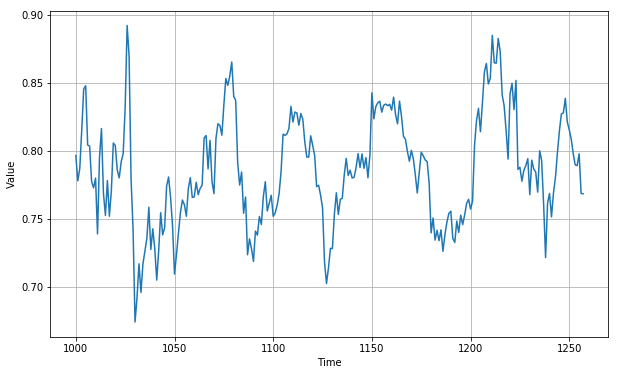

In [204]:
diff_series = (training_set_scaled[1000:] - training_set_scaled[:-1000])
diff_time = time[1000:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

#600--> 1000 looks good; 1000 looks the best

## AutoRegression 

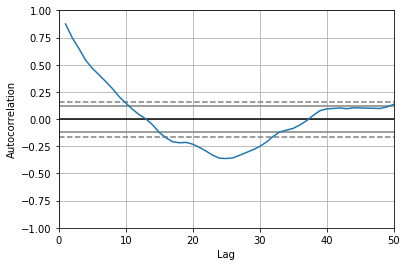

In [206]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(diff_series)

plt.xlim(0,50)# - uncomment to zoom in 
pyplot.show()
# 10 looks like the no 

In [81]:
from statsmodels.tsa.ar_model import AR
from random import random

# fit model
model = AR(x_train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)


Lag: 21
Coefficients: [ 1.27161587e-03  9.26387516e-01  1.00980086e-01 -7.33379784e-02
  2.97244379e-02 -1.24532175e-02  2.56646113e-02 -6.46944739e-03
 -1.68738055e-02 -4.88213383e-04  6.87540464e-02 -9.33317944e-02
  1.98573749e-02  4.76869527e-02  1.06666343e-02 -2.86664940e-02
  2.16550026e-02  3.24223784e-02 -6.53943830e-02  3.85318266e-02
  5.02861545e-02 -7.65673816e-02]


In [117]:
# make prediction
yhat = model_fit.predict(len(x_train), len(x_train))
print(yhat)

[0.87921604]


In [118]:
# make predictions
predictions = model_fit.predict(start=len(x_train), end=len(x_train)+len(x_valid)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], x_valid[i]))

predicted=0.879216, expected=0.882413
predicted=0.879999, expected=0.875121
predicted=0.882377, expected=0.881390
predicted=0.881666, expected=0.907006
predicted=0.883255, expected=0.925441
predicted=0.885851, expected=0.912233
predicted=0.884551, expected=0.862936
predicted=0.881895, expected=0.869354
predicted=0.883808, expected=0.838753
predicted=0.883213, expected=0.839330
predicted=0.884005, expected=0.841450
predicted=0.882638, expected=0.813844
predicted=0.881741, expected=0.823276
predicted=0.883453, expected=0.840334
predicted=0.883391, expected=0.792953
predicted=0.884821, expected=0.768603
predicted=0.886498, expected=0.789084
predicted=0.884288, expected=0.761757
predicted=0.885461, expected=0.787001
predicted=0.886554, expected=0.826847
predicted=0.886923, expected=0.826810
predicted=0.887404, expected=0.808710
predicted=0.888036, expected=0.808375
predicted=0.888295, expected=0.824280
predicted=0.888629, expected=0.841599
predicted=0.889224, expected=0.876814
predicted=0.

Test MSE: 0.006


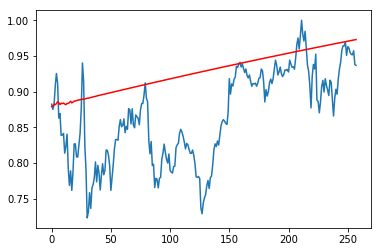

In [122]:
from matplotlib import pyplot

error = mean_squared_error(x_valid, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(x_valid)
pyplot.plot(predictions, color='red')
pyplot.show()

## ARIMA Model

In [174]:
from statsmodels.graphics.tsaplots import plot_pacf

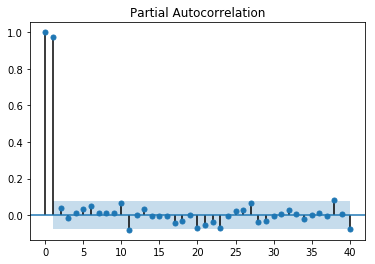

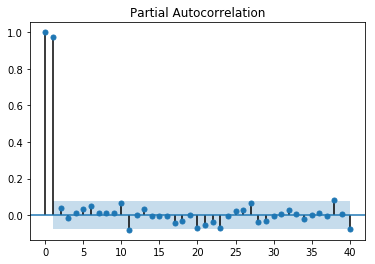

In [201]:
plot_pacf(diff_series, lags = 40)

#from the plots (by changing q values - we get it as 2-3)

In [208]:

# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(diff_series, order=(9, 2, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(diff_series), len(diff_series), typ='levels')
print(yhat)


[0.77348533]


C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

**https://people.duke.edu/~rnau/411arim2.htm**

In [209]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  256
Model:                 ARIMA(9, 2, 2)   Log Likelihood                 640.946
Method:                       css-mle   S.D. of innovations              0.020
Date:                Wed, 26 Feb 2020   AIC                          -1255.892
Time:                        21:04:09   BIC                          -1209.804
Sample:                             2   HQIC                         -1237.355
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.641e-07   1.33e-05      0.027      0.978   -2.57e-05    2.65e-05
ar.L1.D2.y    -0.8255      0.381     -2.166      0.031      -1.573      -0.078
ar.L2.D2.y    -0.1121      0.081     -1.375      0.1

# UCM

In [59]:
#Model Specifications
Unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle' : True, 'stochastic_cycle': True}

# The restricted model forces a smooth trend
restricted_model = { 
    'level': 'smooth trend', 'cycle': True, 'damped_cycle' : True, 'stochastic_cycle': True}


#### Fitting model

In [66]:

#from .mlemodel import MLEModel, MLEResults, MLEResultsWrapper
import statsmodels.api as sm
#output
output = sm.tsa.UnobservedComponents(x_train, **Unrestricted_model)
output_res = output.fit(method='powell', disp=False)

#### Plot

C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1661: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


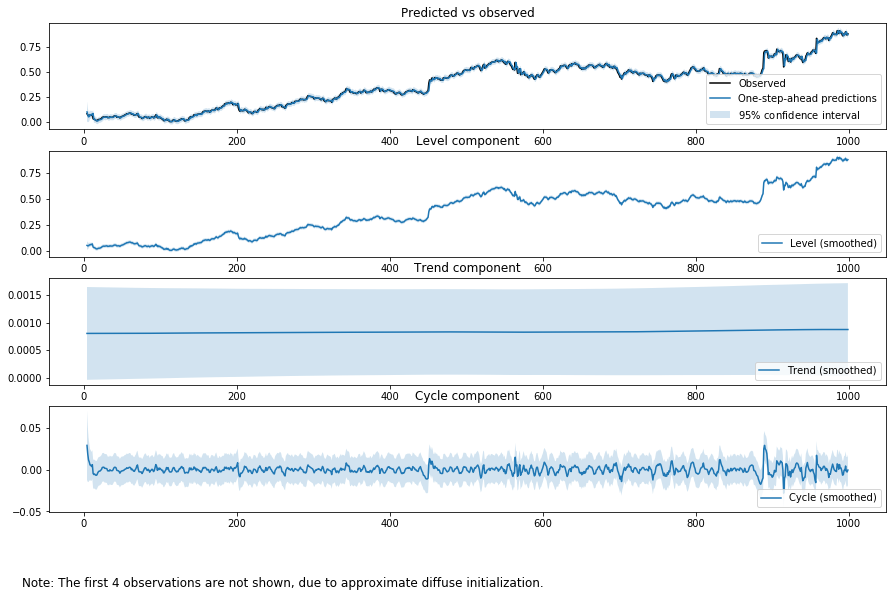

In [67]:
fig = output_res.plot_components(legend_loc='lower right', figsize=(15,9));

## Neural Nets

In [9]:
# Reshape the training and test examples 
X_train_ar = np.array(X_train) ##but it was already done above

train_X = X_train.transpose()
train_Y = y_train.transpose()

print(train_X.shape, train_Y.shape) #m is the no of training examples always in the horizontal column

(60, 1198) (1, 1198)


## Architecture of NN

Now that you are familiar with the dataset, it is time to build a deep neural network.
You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 3.1 - 2-layer neural network


<u>Detailed Architecture of figure 2</u>:
- The input is all features. 
- The corresponding vector: $[x_0,x_1,...,x_{1198}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

### 3.2 - L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:



<u>Detailed Architecture of figure 3</u>:
- The input is all features 
- The corresponding vector: $[x_0,x_1,...,x_{m=1198}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

#### Helper Functions

In [41]:
def sigmoid(Z):

    """
    Implements the sigmoid activation in numpy
    
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache


def relu(Z):

    """

    Implement the RELU function.
    

    """
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache


def relu_backward(dA, cache):

    """

    Implement the backward propagation for a single RELU unit.
    
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ


def sigmoid_backward(dA, cache):

    """
    Implement the backward propagation for a single SIGMOID unit.
    
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ


#### I. Initialize Parameter 

In [52]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    ###mentioned as 3, 2, 1 in the below funcrion call statement       
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


#### II.a. Forward Propogation

In [42]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = W @ A + b ###what is @ meant for 
    #Z = np.dot(W,A) + b --- this is according to our old past 2 nn files, gives the same answer.
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
       
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    #L = len(layer_dims)  this doesnt work   

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters['W{:d}'.format(l)], parameters['b{:d}'.format(l)], activation='relu')
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W%d' % L], parameters['b%d' % L], activation='sigmoid')
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

#### II.b. Cost

In [43]:
def compute_cost(AL, Y):
    """
    Implement the cost function.
    MSE for linear regression
    
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = 1 / m * np.sum(Y * Y + (AL) * (AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


#### II.c. Backward Propogation

In [44]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1 / m * dZ @ A_prev.T
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T @ dZ
    
    
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

#### III. Update Parameters

In [45]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [46]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model 
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = L_model_forward(X, parameters)
    predictions = (A2)
    ### END CODE HERE ###
    
    return predictions

In [47]:
### CONSTANTS DEFINING THE MODEL ####
n_x = train_X.shape[0]     # features== common things=== columns for a dataset
n_h = 7  #no of nodes mostly
n_y = 1   #output guessing
layers_dims = (n_x, n_h, n_y)

### Two layer 

In [48]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
   Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.5691692893380161
Cost after iteration 100: 0.5686548456284302
Cost after iteration 200: 0.5684927552617794
Cost after iteration 300: 0.5690575877913968
Cost after iteration 400: 0.5710893087575051
Cost after iteration 500: 0.5760043818194253
Cost after iteration 600: 0.5859720642483269
Cost after iteration 700: 0.6025933151227879
Cost after iteration 800: 0.6235310119459297
Cost after iteration 900: 0.6421389500188172
Cost after iteration 1000: 0.6538156491003279
Cost after iteration 1100: 0.6591135205106863
Cost after iteration 1200: 0.6607679693813251
Cost after iteration 1300: 0.6607180238273708
Cost after iteration 1400: 0.6598154738774311
Cost after iteration 1500: 0.6585670826910925
Cost after iteration 1600: 0.6573113899481297
Cost after iteration 1700: 0.6564295951924048
Cost after iteration 1800: 0.6554214532696806
Cost after iteration 1900: 0.6540968488395492
Cost after iteration 2000: 0.6527794279207466
Cost after iteration 2100: 0.6515352090974169


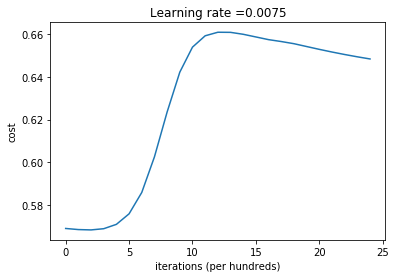

In [49]:
parameters = two_layer_model(train_X, train_Y, layers_dims, num_iterations = 2500, print_cost = True)

In [50]:
pred_train = predict(train_X, parameters)

In [51]:
print ('Accuracy: %d' % float((np.dot(train_Y,pred_train.T) + np.dot(1-train_Y,1-pred_train.T))/float(train_Y.size)*100) + '%')

Accuracy: 59%


### L layer model

In [37]:
### CONSTANTS ###
#layers_dims = [60, 20, 7, 5, 1] #  4-layer model
layers_dims = (n_x, 20, n_h, 5, n_y)

In [38]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """ 
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.569166
Cost after iteration 100: 0.568272
Cost after iteration 200: 0.567532
Cost after iteration 300: 0.566919
Cost after iteration 400: 0.566412
Cost after iteration 500: 0.565992
Cost after iteration 600: 0.565645
Cost after iteration 700: 0.565357
Cost after iteration 800: 0.565118
Cost after iteration 900: 0.564920
Cost after iteration 1000: 0.564757
Cost after iteration 1100: 0.564621
Cost after iteration 1200: 0.564509
Cost after iteration 1300: 0.564415
Cost after iteration 1400: 0.564338
Cost after iteration 1500: 0.564274
Cost after iteration 1600: 0.564221
Cost after iteration 1700: 0.564177
Cost after iteration 1800: 0.564141
Cost after iteration 1900: 0.564111
Cost after iteration 2000: 0.564086
Cost after iteration 2100: 0.564065
Cost after iteration 2200: 0.564048
Cost after iteration 2300: 0.564033
Cost after iteration 2400: 0.564022


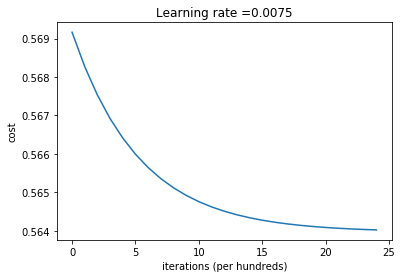

In [39]:
parameters = L_layer_model(train_X, train_Y, layers_dims, num_iterations = 2500, print_cost = True)

In [40]:
pred_train = predict(train_X, parameters)
print ('Accuracy: %d' % float((np.dot(train_Y,pred_train.T) + np.dot(1-train_Y,1-pred_train.T))/float(train_Y.size)*100) + '%')

Accuracy: 50%


# LSTM

In [21]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
conda install keras -v

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Akash\Anaconda3\envs\tensorflow_newenv

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-2.3.1                |                0           6 KB
    keras-base-2.3.1           |           py37_0         585 KB
    pyyaml-5.3                 |   py37he774522_0         153 KB
    ------------------------------------------------------------
                                           Total:         744 KB

The following NEW packages will be INSTALLED:

  keras              pkgs/main/win-64::keras-2.3.1-0
  keras-base         pkgs/main/win-64::keras-base-2.3.1-py37_0
  pyyaml             pkgs/main/win-64::pyyaml-5.3-py37he774522_0
  yaml               pkgs/main/win-64::yaml-0.1.7-hc54c509_2


Preparing transaction: ...working... done
Verifying transaction: .



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda


initializing UnlinkLinkTransaction with
  target_prefix: C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  unlink_precs:
    
  link_precs:
    defaults::yaml-0.1.7-hc54c509_2
    defaults::pyyaml-5.3-py37he774522_0
    defaults::keras-base-2.3.1-py37_0
    defaults::keras-2.3.1-0


===> LINKING PACKAGE: defaults::yaml-0.1.7-hc54c509_2 <===
  prefix=C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  source=C:\Users\Akash\Anaconda3\pkgs\yaml-0.1.7-hc54c509_2


===> LINKING PACKAGE: defaults::pyyaml-5.3-py37he774522_0 <===
  prefix=C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  source=C:\Users\Akash\Anaconda3\pkgs\pyyaml-5.3-py37he774522_0


===> LINKING PACKAGE: defaults::keras-base-2.3.1-py37_0 <===
  prefix=C:\Users\Akash\Anaconda3\envs\tensorflow_newenv
  source=C:\Users\Akash\Anaconda3\pkgs\keras-base-

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = [] #LIST
y_train = [] #list
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) # changed the list to array
y_train = y_train.reshape(1198,1)

#### Reshaping for LSTM

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #this was for the lstm #into 3D shape

#### Model


In [14]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
# Part 3 - Making the predictions and visualising the results


Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0380
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0063
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046A: 
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045A: 
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 8s 6ms/ste

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014A
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014A
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013


In [14]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values# Getting the predicted stock price of 2017


In [15]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'regressor' is not defined

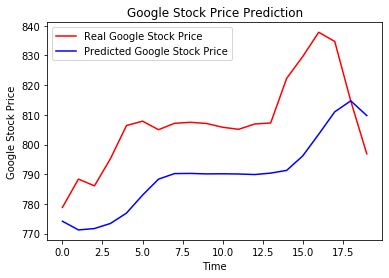

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [23]:
from tensorflow.python.keras.metrics import Metric

In [27]:
tf.keras.metrics.mean_absolute_error(real_stock_price, predicted_stock_price).numpy()

array([ 4.6483154 , 17.120483  , 14.378113  , 21.838867  , 29.492004  ,
       24.918457  , 16.659058  , 16.92633   , 17.215881  , 16.977417  ,
       15.667786  , 15.05127   , 17.022888  , 16.883911  , 31.00586   ,
       33.46698   , 34.34369   , 23.69928   ,  0.04724121, 12.892456  ],
      dtype=float32)

## HIDDEN MARKOV MODEL

In [20]:
pip install hmmlearn==0.1.1

  Running setup.py clean for hmmlearn
Failed to build hmmlearn
  Found existing installation: hmmlearn 0.2.3
    Uninstalling hmmlearn-0.2.3:
      Successfully uninstalled hmmlearn-0.2.3
  Running setup.py install for hmmlearn: started
    Running setup.py install for hmmlearn: finished with status 'error'
  Rolling back uninstall of hmmlearn
  Moving to c:\users\akash\anaconda3\lib\site-packages\hmmlearn-0.2.3.dist-info\
   from c:\users\akash\anaconda3\lib\site-packages\~mmlearn-0.2.3.dist-info
  Moving to c:\users\akash\anaconda3\lib\site-packages\hmmlearn\
   from c:\users\akash\anaconda3\lib\site-packages\~mmlearn
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Akash\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Akash\\AppData\\Local\\Temp\\pip-install-tkrh56_a\\hmmlearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\Akash\\AppData\\Local\\Temp\\pip-install-tkrh56_a\\hmmlearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Akash\AppData\Local\Temp\pip-wheel-b5zb8geg' --python-tag cp37
       cwd: C:\Users\Akash\AppData\Local\Temp\pip-install-tkrh56_a\hmmlearn\
  Complete output (18 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\hmmlearn
  copying hmmlearn\base.py -> build\lib.win-amd64-3.7\hmmlearn
  copying hmmlearn\hmm.py -> build\lib.win-amd64-3.7\hmmlearn
  copying hmmlearn\_

In [10]:
import numpy as np
#from sklearn import hmm
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train.shape
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [18]:
#model = hmm.GaussianHMM(3, "full", X_train, y_train)
model2 = hmm.GaussianHMM(n_components=5, covariance_type='full', tol=0.0001, n_iter=10000)

In [16]:
labels = ['Close','Open','High','Low']

likelihood_vect = np.empty([0,1])
aic_vect = np.empty([0,1])
bic_vect = np.empty([0,1])

In [17]:
# Possible number of states in Markov Model
STATE_SPACE = range(2,15)

# Calculating Mean Absolute Percentage Error of predictions
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])



In [19]:

model2.fit([training_set_scaled]) 

#Z2 = model2.predict(X_train)

ValueError: Found array with dim 3. Estimator expected <= 2.